# 39 Working with Shapely Base Geometries containing Z components

Shapely Base Geometries can not only have an X and Y coordinate but also a Z component. The following introduces how GemGIS is handling Shapely Base Geometries with an additional Z component.

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/39_shapely_base_geometries_with_z_component/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Point Data

Points can easily be defined using an X, Y and Z coordinate.

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


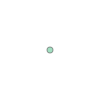

In [2]:
import gemgis as gg
from shapely.geometry import Point

point = Point(1,2,3)
point

In [3]:
point.wkt

'POINT Z (1 2 3)'

Despite the Z component, the point is still a regular Shapely Point.

In [4]:
type(point)

shapely.geometry.point.Point

But the attribute that an object has a z component is now set to ``True``.

In [5]:
point.has_z

True

### Accessing the coordinates

The coordinates can be accessed via attributes.

In [6]:
point.x

1.0

In [7]:
point.y

2.0

In [8]:
point.z

3.0

### Creating a GeoDataFrame and extracting coordinates

In [9]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=[point, point])
gdf

,geometry
0,POINT Z (1.00000 2.00000 3.00000)
1,POINT Z (1.00000 2.00000 3.00000)


### Extracting Coordinates

In [10]:
gdf_xyz = gg.vector.extract_xyz_points(gdf=gdf)
gdf_xyz

,geometry,X,Y,Z
0,POINT Z (1.00000 2.00000 3.00000),1.00,2.00,3.00
1,POINT Z (1.00000 2.00000 3.00000),1.00,2.00,3.00


In [11]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf)
gdf_xyz

,geometry,X,Y,Z
0,POINT Z (1.00000 2.00000 3.00000),1.00,2.00,3.00
1,POINT Z (1.00000 2.00000 3.00000),1.00,2.00,3.00


## LineString Data

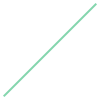

In [12]:
import gemgis as gg
from shapely.geometry import LineString

linestring = LineString(([1,2,3], [4,5,6]))
linestring

In [13]:
linestring.wkt

'LINESTRING Z (1 2 3, 4 5 6)'

Despite the Z component, the line is still a regular Shapely LineString.

In [14]:
type(linestring)

shapely.geometry.linestring.LineString

But the attribute that an object has a z component is now set to ``True``.

In [15]:
linestring.has_z

True

### Accessing the coordinates

The coordinates can be accessed via attributes.

In [16]:
list(linestring.coords)

[(1.0, 2.0, 3.0), (4.0, 5.0, 6.0)]

### Creating a GeoDataFrame and extracting coordinates

In [17]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=[linestring, linestring])
gdf

,geometry
0,"LINESTRING Z (1.00000 2.00000 3.00000, 4.00000..."
1,"LINESTRING Z (1.00000 2.00000 3.00000, 4.00000..."


### Extracting Coordinates

``extract_xy_linestrings(..)`` will also work for extracting the xyz coordinates as the used Pandas ``explode(..)`` function also extracts the Z component of the LineString object. In the subsequent definition of the columns for the coordinates, an additional Z column will be created if a Value error would have been returned before that. 

In [18]:
gdf_xyz = gg.vector.extract_xy_linestrings(gdf=gdf)
gdf_xyz

,geometry,X,Y,Z
0,POINT (1.00000 2.00000),1.00,2.00,3.00
1,POINT (4.00000 5.00000),4.00,5.00,6.00
2,POINT (1.00000 2.00000),1.00,2.00,3.00
3,POINT (4.00000 5.00000),4.00,5.00,6.00


However, a dedicated function to extract the X, Y and Z coordinates from a GeoDataFrame containing LineStrings with a Z component is also implemented in GemGIS -> ``extract_xyz_linestrings(...)``.

In [19]:
gdf_xyz = gg.vector.extract_xyz_linestrings(gdf=gdf, reset_index=True)
gdf_xyz

,geometry,points,X,Y,Z
0,POINT (1.00000 2.00000),"(1.0, 2.0, 3.0)",1.00,2.00,3.00
1,POINT (4.00000 5.00000),"(4.0, 5.0, 6.0)",4.00,5.00,6.00
2,POINT (1.00000 2.00000),"(1.0, 2.0, 3.0)",1.00,2.00,3.00
3,POINT (4.00000 5.00000),"(4.0, 5.0, 6.0)",4.00,5.00,6.00


The coordinates can also be extracted using the common function ``extract_xyz(...)``.

In [20]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf)
gdf_xyz

,geometry,X,Y,Z
0,POINT (1.00000 2.00000),1.00,2.00,3.00
1,POINT (4.00000 5.00000),4.00,5.00,6.00
2,POINT (1.00000 2.00000),1.00,2.00,3.00
3,POINT (4.00000 5.00000),4.00,5.00,6.00


## Polygon Data

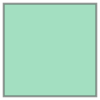

In [21]:
import gemgis as gg
from shapely.geometry import Polygon

polygon = Polygon([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 0]])
polygon

In [22]:
polygon.wkt

'POLYGON Z ((0 0 0, 1 0 0, 1 1 0, 0 1 0, 0 0 0))'

Despite the Z component, the line is still a regular Shapely Polygon.

In [23]:
type(polygon)

shapely.geometry.polygon.Polygon

But the attribute that an object has a z component is now set to ``True``.

In [24]:
polygon.has_z

True

### Accessing the coordinates

The coordinates can be accessed via attributes.

In [25]:
list(polygon.exterior.coords)

[(0.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 1.0, 0.0),
 (0.0, 1.0, 0.0),
 (0.0, 0.0, 0.0)]

### Creating a GeoDataFrame and extracting coordinates

In [26]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=[polygon, polygon])
gdf

,geometry
0,"POLYGON Z ((0.00000 0.00000 0.00000, 1.00000 0..."
1,"POLYGON Z ((0.00000 0.00000 0.00000, 1.00000 0..."


## Extracting Coordinates

The coordinates can be extracted easily with ``extract_xyz(...)``. As the polygons are exploded into LineStrings during the process of extracting the coordinates, the functionality to extract coordinates from Polygons is already present. 

In [27]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf)
gdf_xyz

,geometry,X,Y,Z
0,POINT (0.00000 0.00000),0.00,0.00,0.00
1,POINT (1.00000 0.00000),1.00,0.00,0.00
2,POINT (1.00000 1.00000),1.00,1.00,0.00
3,POINT (0.00000 1.00000),0.00,1.00,0.00
4,POINT (0.00000 0.00000),0.00,0.00,0.00
5,POINT (0.00000 0.00000),0.00,0.00,0.00
6,POINT (1.00000 0.00000),1.00,0.00,0.00
7,POINT (1.00000 1.00000),1.00,1.00,0.00
8,POINT (0.00000 1.00000),0.00,1.00,0.00
9,POINT (0.00000 0.00000),0.00,0.00,0.00
